Joe Freedman - A47774975

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
%matplotlib inline

# MLE

## (a)

Given
$$ p(x\mid\lambda)=\frac{e^{-\lambda}\lambda^x}{x!} $$ 

Likelihood
$$L(\lambda) = \underset{\lambda}{\operatorname{argmax}}
\prod_{k=1}^{N}\frac{e^{-\lambda}\lambda^x_k}{x_k!} $$ 

Log-Likelihood
$$=>l(\lambda) = \underset{\lambda}{\operatorname{argmax}}
\sum_{k=1}^{N}ln(\frac{e^{-\lambda}\lambda^x_k}{x_k!}) $$

$$=>l(\lambda) = \underset{\lambda}{\operatorname{argmax}}
\sum_{k=1}^{N}[-\lambda+x_kln\lambda-ln(x_k!)] $$

$$=>l(\lambda) = \underset{\lambda}{\operatorname{argmax}}
-N\lambda+ln\lambda\sum_{k=1}^{N}x_k-\sum_{k=1}^{N}ln(x_k!) $$

$$=>\frac{d}{d\lambda}l(\lambda) = 0 $$ 

Solve for $\lambda$ which will be $\hat{\lambda}_{mle}$
$$=>\frac{d}{d\lambda}[-N\lambda+ln\lambda\sum_{k=1}^{N}x_k-\sum_{k=1}^{N}ln(x_k!)] = 0 $$

$$=>-N+\frac{1}{\lambda}\sum_{k=1}^{N}x_k = 0 $$

$$=>\hat{\lambda}_{mle} = \frac{1}{N} \sum_{k=1}^{N}x_k$$

## (b)

lambda_mle for training samples = 9.933


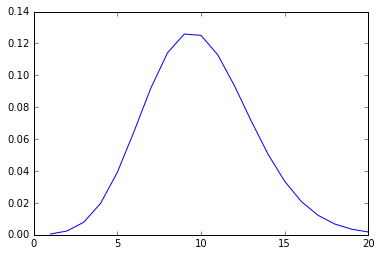

In [2]:
def compute_lambda_mle(l):
    return sum(l)/len(l)

fp = open("random_poisson.txt")
data = sorted([int(line.strip()) for line in fp])
lambda_mle = compute_lambda_mle(data)
print("lambda_mle for training samples = {}".format(lambda_mle))

plt.plot(data, scipy.stats.poisson(lambda_mle).pmf(data))

# Uniform Distribution

## (a)

$$p(x\mid\theta)~U(0,\theta)=\left\{
        \begin{array}{ll}
            \frac{1}{\theta} & \quad 0 \leq x \leq \theta \\
            0 & \quad otherwise
        \end{array}
    \right.$$
    
$$L(\theta)=\prod_{k=1}^n\frac{1}{\theta_k} = \theta^{-n}$$

$$lnL(\theta)=-nln\theta$$

$$\frac{d}{d\theta}lnL(\theta)=0$$

$$\frac{-n}{\theta}=0$$

$\theta$ to maximize the deriviative $\frac{d}{d\theta}lnL(\theta)$ is smallest possible $\theta$ (closest to $0$). This occurs in the uniform distribution's max since it is uniform to $\frac{1}{\theta}$. Therefore $\hat{\theta}_{MLE} = max[D]$.

## (b)

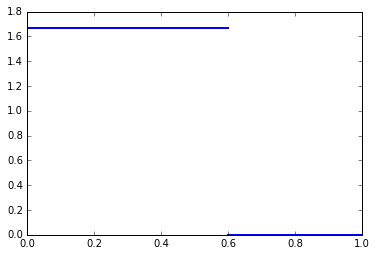

In [299]:
x = np.linspace(0,0.6,1000)
y = [1/0.6 for val in x]
plt.plot(x,y, linewidth=2.0)

x = np.linspace(0.6,1,1000)
y = [0 for val in x]
plt.plot(x,y, linewidth=2.0, color='b')

The values of the other 4 points are not needed because as shown in part (a), the max value dictates what the distribution looks like.

# Bernoulli Distribution

$$p(x\mid\theta)=\prod_{i=1}^d\theta_i^{x_i}(1-\theta_i)^{1-x_i}$$

$$L(\theta) = \prod_{k=1}^n\prod_{i=1}^d\theta_i^{x_i}(1-\theta_i)^{1-x_i}$$

$$lnL(\theta) = \sum_{k=1}^n\sum_{i=1}^dx_i-ln\theta_i(1-x_i)ln(1-\theta_i)$$

$$lnL(\theta) = \sum_{k=1}^ndx_kln\theta_k-d(1-x_k)ln(1-\theta_k)$$

This shows that the Bernoulli Distribution is based on one parameter $\theta$. The entire distribution can be modeled with $\theta$ and the MLE represents the $\theta$ value that best approximates the distribution for the given training data.

# $\omega_1$ and $\omega_2$ Classification

In [3]:
mu1 = np.array([5,5])
sigma1 = np.array([[1, 0],[0, 1]])
mu2 = np.array([10, 10])
sigma2 = np.array([[1, 0],[0, 1]])

dist1_50 = [np.random.multivariate_normal(mu1, sigma1) \
            for _ in range(50)]
dist2_50 = [np.random.multivariate_normal(mu2, sigma2) \
            for _ in range (50)]

dist1_1000 = [np.random.multivariate_normal(mu1, sigma1) \
              for _ in range(1000)]
dist2_1000 = [np.random.multivariate_normal(mu2, sigma2) \
              for _ in range (1000)]

dist1_10000 = [np.random.multivariate_normal(mu1, sigma1) \
               for _ in range(10000)]
dist2_10000 = [np.random.multivariate_normal(mu2, sigma2) \
               for _ in range (10000)]

## (a)

In [4]:
mu1_mle = sum(dist1_50)/len(dist1_50)
sig1_interm = [np.outer([x1,x2] - mu1_mle, \
                        [x1,x2] - mu1_mle) for (x1,x2) in dist1_50]
sig1_mle = sum(sig1_interm)/len(sig1_interm)
sig1_mle_det = np.linalg.det(sig1_mle)
sig1_mle_inv = np.linalg.inv(sig1_mle)

print("mu1_mle = \n{}\n".format(mu1_mle.reshape(2,1)))
print("sig1_mle = \n{}\n".format(sig1_mle))
print("sig1_mle_det = \n{}\n".format(sig1_mle_det))
print("sig1_mle_inv = \n{}\n".format(sig1_mle_inv))


mu2_mle = sum(dist2_50)/len(dist2_50)
sig2_interm = [np.outer([x1,x2] - mu2_mle, \
                        [x1,x2] - mu1_mle) for (x1,x2) in dist2_50]
sig2_mle = sum(sig2_interm)/len(sig2_interm)
sig2_mle_det = np.linalg.det(sig2_mle)
sig2_mle_inv = np.linalg.inv(sig2_mle)

print("mu2_mle = \n{}\n".format(mu2_mle.reshape(2,1)))
print("sig2_mle = \n{}\n".format(sig2_mle))
print("sig2_mle_det = \n{}\n".format(sig2_mle_det))
print("sig2_mle_inv = \n{}".format(sig2_mle_inv))

mu1_mle = 
[[5.12808011]
 [4.87646613]]

sig1_mle = 
[[ 1.03830413 -0.18534008]
 [-0.18534008  1.01031005]]

sig1_mle_det = 
1.0146581502224234

sig1_mle_inv = 
[[0.99571471 0.18266258]
 [0.18266258 1.02330438]]

mu2_mle = 
[[10.01727824]
 [ 9.80600274]]

sig2_mle = 
[[ 0.95173649 -0.01821535]
 [-0.01821535  1.30251381]]

sig2_mle_det = 
1.2393181248861833

sig2_mle_inv = 
[[1.0509923  0.01469788]
 [0.01469788 0.76795172]]


## (b)

Bayes Decision Rule 
$$p(\omega_j\mid x) = \frac{p(x\mid\omega_j)p(\omega_j)}{p(x)} $$

Set $p(\omega_1\mid x) = p(\omega_2\mid x)$ and solve for x. $p(x)$ cancels. As does $p(\omega_j)$. 

Then take natural log of both sides.

$$lnp(x\mid\omega_1)+lnp(x\mid\omega_2)$$

$$ln\begin{vmatrix}\Sigma_1\end{vmatrix}+(x-\mu_1)^t\Sigma_1^{-1}(x-\mu_1)=ln\begin{vmatrix}\Sigma_2\end{vmatrix}+(x-\mu_2)^t\Sigma_2^{-1}(x-\mu_2)$$

$$ln(1.015)+\begin{bmatrix}x_1-5.13&x_2-4.88\end{bmatrix}
\begin{bmatrix}0.996&0.183\\0.183&1.023\end{bmatrix}
\begin{bmatrix}x_1-5.13\\x_2-4.88\end{bmatrix}
=$$$$ln(1.24)+\begin{bmatrix}x_1-10.02&x_2-9.81\end{bmatrix}
\begin{bmatrix}1.05&0.015\\0.015&0.768\end{bmatrix}
\begin{bmatrix}x_1-10.02\\x_2-9.81\end{bmatrix}$$

Plug into wolfram alpha: "ln(1.015)+0.996(x_1-5.13)^2+1.023(x_2-4.88)^2=ln(1.24)+1.05(x_1-10.02)^2+0.768(x_2-9.81)^2".

$$x_2\approx6.3249×10^{-11}(19479.6\sqrt{1.39505×10^{11}x_1^2 - 2.79605×10^{13}x_1 + 3.98604×10^{14}} - 1.57599×10^{11})$$

Correctly classified: 100 data points (50 as w1 and 50 as w2)
Incorrectly classified: 0 data points(0 as w1 and 0 as w2)
Total: 100 data points
Error rate 0/100 = 0.0

confusion_matrix_est_bndry =
[[50  0]
 [ 0 50]]


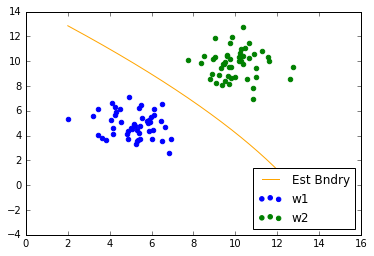

In [16]:
plt.scatter([x1 for (x1,x2) in dist1_50], \
            [x2 for (x1,x2) in dist1_50], color='b', label="w1")
plt.scatter([x1 for (x1,x2) in dist2_50], \
            [x2 for (x1,x2) in dist2_50], color='g', label="w2")

x = np.linspace(2, 14, 1000)
y = [6.3249*10**-11*(19479.6*math.sqrt(1.39505*10**11*val**2 - \
                                       2.79605*10**13*val + \
                                       3.98604*10**14) - \
                     1.57599*10**11) for val in x]
plt.plot(x,y, color = 'orange', label="Est Bndry")

plt.legend(loc=4)

# Find correctly and incorrectly classified data points
correct_w1, incorrect_w1, correct_w2, incorrect_w2 = 0, 0, 0, 0
for x,y in dist1_50:
    if -y+6.3249*10**-11*(19479.6*math.sqrt(1.39505*10**11*x**2 - \
                                            2.79605*10**13*x + \
                                            3.98604*10**14) - \
                          1.57599*10**11) > 0:
        correct_w1 += 1
    else:
        incorrect_w1 += 1
        
for x,y in dist2_50:
    if -y+6.3249*10**-11*(19479.6*math.sqrt(1.39505*10**11*x**2 - \
                                            2.79605*10**13*x + \
                                            3.98604*10**14) - \
                          1.57599*10**11) > 0:
        incorrect_w2 += 1
    else:
        correct_w2 += 1
            
total = correct_w1+incorrect_w1+correct_w2+incorrect_w2
correct_total = correct_w1 + correct_w2
incorrect_total = incorrect_w1 + incorrect_w2
output = """Correctly classified: {} data points ({} as w1 and {} as w2)
Incorrectly classified: {} data points({} as w1 and {} as w2)
Total: {} data points\nError rate {}/{} = {}"""
print(output.format(correct_total, correct_w1, correct_w2, \
                    incorrect_total, incorrect_w1, incorrect_w2,\
                    total, incorrect_total, total, \
                    incorrect_total/total))
confusion = np.array([[correct_w1, incorrect_w1],\
                      [incorrect_w2, correct_w2]])

print("\nconfusion_matrix_est_bndry =")
print(confusion)

## (c)

Bayes Decision Rule 
$$p(\omega_j\mid x) = \frac{p(x\mid\omega_j)p(\omega_j)}{p(x)} $$

Set $p(\omega_1\mid x) = p(\omega_2\mid x)$ and solve for x. $p(x)$ cancels. As does $p(\omega_j)$. 

Then take natural log of both sides.

$$lnp(x\mid\omega_1)+lnp(x\mid\omega_2)$$

$$ln\begin{vmatrix}\Sigma_1\end{vmatrix}+(x-\mu_1)^t\Sigma_1^{-1}(x-\mu_1)=ln\begin{vmatrix}\Sigma_2\end{vmatrix}+(x-\mu_2)^t\Sigma_2^{-1}(x-\mu_2)$$

Since $\Sigma_1=\Sigma_2=\Sigma_1^{-1}=\Sigma_2^{-1}=I$ and $det(I)=1$ and $ln1=0$

$$(x-\mu_1)^t(x-\mu_1)=(x-\mu_2)^t{-1}(x-\mu_2)$$

$$\begin{bmatrix}x_1-5&x_2-5\end{bmatrix}
\begin{bmatrix}x_1-5\\x_2-5\end{bmatrix}
=\begin{bmatrix}x_1-10&x_2-10\end{bmatrix}
\begin{bmatrix}x_1-10\\x_2-10\end{bmatrix}$$

$$(x_1-5)^2+(x_2-5)^2=(x_1-10)^2+(x_2-10)^2$$

$$10x_1+10x_2-150=0$$

$$x_1+x_2-15=0$$

$$x_2=15-x_1$$

Correctly classified: 100 data points (50 as w1 and 50 as w2)
Incorrectly classified: 0 data points(0 as w1 and 0 as w2)
Total: 100 data points
Error rate 0/100 = 0.0

confusion_matrix_true_bndry =
[[50  0]
 [ 0 50]]


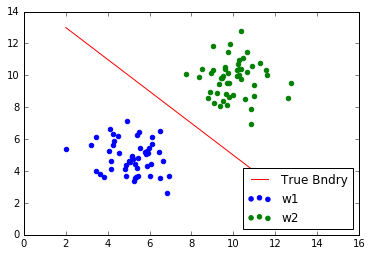

In [6]:
plt.scatter([x1 for (x1,x2) in dist1_50], \
            [x2 for (x1,x2) in dist1_50], color='b', label="w1")
plt.scatter([x1 for (x1,x2) in dist2_50], \
            [x2 for (x1,x2) in dist2_50], color='g', label="w2")

x = np.linspace(2, 14, 1000)
y = [15-val for val in x]
plt.plot(x,y, color = 'r', label="True Bndry")

plt.legend(loc=4)

# Find correctly and incorrectly classified data points
correct_w1, incorrect_w1, correct_w2, incorrect_w2 = 0, 0, 0, 0
for x,y in dist1_50:
    if -y+15-x > 0:
        correct_w1 += 1
    else:
        incorrect_w1 += 1
        
for x,y in dist2_50:
    if -y+15-x > 0:
        incorrect_w2 += 1
    else:
        correct_w2 += 1
            
total = correct_w1+incorrect_w1+correct_w2+incorrect_w2
correct_total = correct_w1 + correct_w2
incorrect_total = incorrect_w1 + incorrect_w2
output = """Correctly classified: {} data points ({} as w1 and {} as w2)
Incorrectly classified: {} data points({} as w1 and {} as w2)
Total: {} data points\nError rate {}/{} = {}"""
print(output.format(correct_total, correct_w1, correct_w2, \
                    incorrect_total, incorrect_w1, incorrect_w2,\
                    total, incorrect_total, total, \
                    incorrect_total/total))
confusion = np.array([[correct_w1, incorrect_w1],\
                      [incorrect_w2, correct_w2]])

print("\nconfusion_matrix_true_bndry =")
print(confusion)

## (d)

### 1000 Random Points

In [7]:
mu1_mle = sum(dist1_1000)/len(dist1_1000)
sig1_interm = [np.outer([x1,x2] - mu1_mle, \
                        [x1,x2] - mu1_mle) for (x1,x2) in dist1_1000]
sig1_mle = sum(sig1_interm)/len(sig1_interm)
sig1_mle_det = np.linalg.det(sig1_mle)
sig1_mle_inv = np.linalg.inv(sig1_mle)

print("mu1_mle = \n{}\n".format(mu1_mle.reshape(2,1)))
print("sig1_mle = \n{}\n".format(sig1_mle))
print("sig1_mle_det = \n{}\n".format(sig1_mle_det))
print("sig1_mle_inv = \n{}\n".format(sig1_mle_inv))


mu2_mle = sum(dist2_1000)/len(dist2_1000)
sig2_interm = [np.outer([x1,x2] - mu2_mle, \
                        [x1,x2] - mu1_mle) for (x1,x2) in dist2_1000]
sig2_mle = sum(sig2_interm)/len(sig2_interm)
sig2_mle_det = np.linalg.det(sig2_mle)
sig2_mle_inv = np.linalg.inv(sig2_mle)

print("mu2_mle = \n{}\n".format(mu2_mle.reshape(2,1)))
print("sig2_mle = \n{}\n".format(sig2_mle))
print("sig2_mle_det = \n{}\n".format(sig2_mle_det))
print("sig2_mle_inv = \n{}".format(sig2_mle_inv))

mu1_mle = 
[[5.06057129]
 [5.00110466]]

sig1_mle = 
[[0.98173784 0.018121  ]
 [0.018121   0.97867797]]

sig1_mle_det = 
0.9604768189450288

sig1_mle_inv = 
[[ 1.01895012 -0.01886667]
 [-0.01886667  1.0221359 ]]

mu2_mle = 
[[9.93931807]
 [9.98751904]]

sig2_mle = 
[[ 0.99183267 -0.0088699 ]
 [-0.0088699   0.96439665]]

sig2_mle_det = 
0.9564414291322848

sig2_mle_inv = 
[[1.00831752 0.00927386]
 [0.00927386 1.03700304]]


Bayes Decision Rule 
$$p(\omega_j\mid x) = \frac{p(x\mid\omega_j)p(\omega_j)}{p(x)} $$

Set $p(\omega_1\mid x) = p(\omega_2\mid x)$ and solve for x. $p(x)$ cancels. As does $p(\omega_j)$. 

Then take natural log of both sides.

$$lnp(x\mid\omega_1)+lnp(x\mid\omega_2)$$

$$ln\begin{vmatrix}\Sigma_1\end{vmatrix}+(x-\mu_1)^t\Sigma_1^{-1}(x-\mu_1)=ln\begin{vmatrix}\Sigma_2\end{vmatrix}+(x-\mu_2)^t\Sigma_2^{-1}(x-\mu_2)$$

$$ln(0.96)+\begin{bmatrix}x_1-5.06&x_2-5.00\end{bmatrix}
\begin{bmatrix}1.019&-0.019\\-0.019&1.022\end{bmatrix}
\begin{bmatrix}x_1-5.06\\x_2-5.00\end{bmatrix}
=$$$$ln(0.956)+\begin{bmatrix}x_1-9.94&x_2-9.99\end{bmatrix}
\begin{bmatrix}1.008&-0.01\\-0.01&1.037\end{bmatrix}
\begin{bmatrix}x_1-9.94\\x_2-9.99\end{bmatrix}$$

Plug into wolfram alpha: "ln(0.96)+1.019(x_1-5.06)^2+1.022(x_2-5.00)^2=ln(0.956)+1.008(x_1-9.94)^2+1.037(x_2-9.99)^2".

$$x_2\approx1.54456×10^{-9}(2.26586×10^{11} - 656.98\sqrt{7.12178×10^{11}x_1^2 + 6.29744×10^{14}x_1 + 1.09144×10^{17}})$$

Correctly classified: 1999 data points (1000 as w1 and 999 as w2)
Incorrectly classified: 1 data points(0 as w1 and 1 as w2)
Total: 2000 data points
Error rate 1/2000 = 0.0005

confusion_matrix_est_bndry =
[[1000    0]
 [   1  999]]


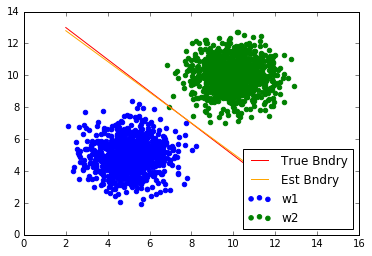

In [21]:
plt.scatter([x1 for (x1,x2) in dist1_1000], \
            [x2 for (x1,x2) in dist1_1000], color='b', label="w1")
plt.scatter([x1 for (x1,x2) in dist2_1000], \
            [x2 for (x1,x2) in dist2_1000], color='g', label="w2")

x = np.linspace(2, 14, 1000)
y = [15-val for val in x]
plt.plot(x,y, color = 'r', label='True Bndry')

x = np.linspace(2, 14, 1000)
y = [1.54456*10**-9*(2.26586*10**11 - 656.98*\
                     math.sqrt(7.12178*10**11*\
                               val**2 + 6.29744*10**14*val +\
                               1.09144*10**17)) for val in x]
plt.plot(x,y, color = 'orange', label="Est Bndry")

plt.legend(loc=4)

# Find correctly and incorrectly classified data points
correct_w1, incorrect_w1, correct_w2, incorrect_w2 = 0, 0, 0, 0
for x,y in dist1_1000:
    if -y+1.54456*10**-9*(2.26586*10**11 - 656.98*\
                          math.sqrt(7.12178*10**11*\
                                    x**2 + 6.29744*10**14*x + \
                                    1.09144*10**17)) > 0:
        correct_w1 += 1
    else:
        incorrect_w1 += 1
        
for x,y in dist2_1000:
    if -y+1.54456*10**-9*(2.26586*10**11 - 656.98*\
                          math.sqrt(7.12178*10**11*\
                                    x**2 + 6.29744*10**14*x + \
                                    1.09144*10**17)) > 0:
        incorrect_w2 += 1
    else:
        correct_w2 += 1
            
total = correct_w1+incorrect_w1+correct_w2+incorrect_w2
correct_total = correct_w1 + correct_w2
incorrect_total = incorrect_w1 + incorrect_w2
output = """Correctly classified: {} data points ({} as w1 and {} as w2)
Incorrectly classified: {} data points({} as w1 and {} as w2)
Total: {} data points\nError rate {}/{} = {}"""
print(output.format(correct_total, correct_w1, correct_w2, \
                    incorrect_total, incorrect_w1, incorrect_w2,\
                    total, incorrect_total, total, \
                    incorrect_total/total))
confusion = np.array([[correct_w1, incorrect_w1],\
                      [incorrect_w2, correct_w2]])

print("\nconfusion_matrix_est_bndry =")
print(confusion)

### 10000 Random Points

In [9]:
mu1_mle = sum(dist1_10000)/len(dist1_10000)
sig1_interm = [np.outer([x1,x2] - mu1_mle, \
                        [x1,x2] - mu1_mle) for (x1,x2) in dist1_10000]
sig1_mle = sum(sig1_interm)/len(sig1_interm)
sig1_mle_det = np.linalg.det(sig1_mle)
sig1_mle_inv = np.linalg.inv(sig1_mle)

print("mu1_mle = \n{}\n".format(mu1_mle.reshape(2,1)))
print("sig1_mle = \n{}\n".format(sig1_mle))
print("sig1_mle_det = \n{}\n".format(sig1_mle_det))
print("sig1_mle_inv = \n{}\n".format(sig1_mle_inv))


mu2_mle = sum(dist2_10000)/len(dist2_10000)
sig2_interm = [np.outer([x1,x2] - mu2_mle, \
                        [x1,x2] - mu1_mle) for (x1,x2) in dist2_10000]
sig2_mle = sum(sig2_interm)/len(sig2_interm)
sig2_mle_det = np.linalg.det(sig2_mle)
sig2_mle_inv = np.linalg.inv(sig2_mle)

print("mu2_mle = \n{}\n".format(mu2_mle.reshape(2,1)))
print("sig2_mle = \n{}\n".format(sig2_mle))
print("sig2_mle_det = \n{}\n".format(sig2_mle_det))
print("sig2_mle_inv = \n{}".format(sig2_mle_inv))

mu1_mle = 
[[4.9828904 ]
 [5.00180622]]

sig1_mle = 
[[ 0.9863034  -0.00626088]
 [-0.00626088  0.99844516]]

sig1_mle_det = 
0.9847306587359723

sig1_mle_inv = 
[[1.01392716 0.00635797]
 [0.00635797 1.00159713]]

mu2_mle = 
[[ 9.99666947]
 [10.0128739 ]]

sig2_mle = 
[[ 1.01980929 -0.00441288]
 [-0.00441288  0.98070136]]

sig2_mle_det = 
1.0001088891269236

sig2_mle_inv = 
[[0.98059459 0.0044124 ]
 [0.0044124  1.01969826]]


Bayes Decision Rule 
$$p(\omega_j\mid x) = \frac{p(x\mid\omega_j)p(\omega_j)}{p(x)} $$

Set $p(\omega_1\mid x) = p(\omega_2\mid x)$ and solve for x. $p(x)$ cancels. As does $p(\omega_j)$. 

Then take natural log of both sides.

$$lnp(x\mid\omega_1)+lnp(x\mid\omega_2)$$

$$ln\begin{vmatrix}\Sigma_1\end{vmatrix}+(x-\mu_1)^t\Sigma_1^{-1}(x-\mu_1)=ln\begin{vmatrix}\Sigma_2\end{vmatrix}+(x-\mu_2)^t\Sigma_2^{-1}(x-\mu_2)$$

$$ln(0.985)+\begin{bmatrix}x_1-4.98&x_2-5.00\end{bmatrix}
\begin{bmatrix}1.014&0.006\\0.006&1.002\end{bmatrix}
\begin{bmatrix}x_1-4.98\\x_2-5.00\end{bmatrix}
=$$$$ln(1.00)+\begin{bmatrix}x_1-9.997&x_2-10.01\end{bmatrix}
\begin{bmatrix}0.98&0.004\\0.004&1.02\end{bmatrix}
\begin{bmatrix}x_1-9.996\\x_2-10.01\end{bmatrix}$$

Plug into wolfram alpha: "ln(0.985)+1.014(x_1-4.98)^2+1.002(x_2-5.00)^2=ln(1.00)+0.98(x_1-9.997)^2+1.02(x_2-10.01)^2".

$$x_2\approx1.02851×10^{-53}(2.80893×10^{55} - 3.77422×10^{28}\sqrt{1.25354×10^{49} x_1^2 + 3.50057×10^{51} x_1 + 4.98604×10^{53}})$$

Correctly classified: 19998 data points (9999 as w1 and 9999 as w2)
Incorrectly classified: 2 data points(1 as w1 and 1 as w2)
Total: 20000 data points
Error rate 2/20000 = 0.0001

confusion_matrix_est_bndry =
[[9999    1]
 [   1 9999]]


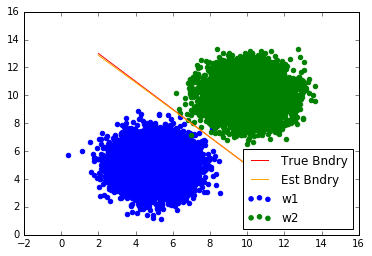

In [25]:
plt.scatter([x1 for (x1,x2) in dist1_10000], \
            [x2 for (x1,x2) in dist1_10000], color='b', label="w1")
plt.scatter([x1 for (x1,x2) in dist2_10000], \
            [x2 for (x1,x2) in dist2_10000], color='g', label="w2")

x = np.linspace(2, 14, 1000)
y = [15-val for val in x]
plt.plot(x,y, color = 'r', label='True Bndry')

x = np.linspace(2, 14, 1000)
y = [1.02851*10**-53*(2.80893*10**55 - 3.77422*10**28*\
                      math.sqrt(1.25354*10**49*val**2 \
                                + 3.50057*10**51*val + \
                                4.98604*10**53)) for val in x]
plt.plot(x,y, color = 'orange', label="Est Bndry")

plt.legend(loc=4)


# Find correctly and incorrectly classified data points
correct_w1, incorrect_w1, correct_w2, incorrect_w2 = 0, 0, 0, 0
for x,y in dist1_10000:
    if -y+1.02851*10**-53*(2.80893*10**55 - 3.77422*10**28*\
                           math.sqrt(1.25354*10**49*x**2 \
                                     + 3.50057*10**51*x + \
                                     4.98604*10**53)) > 0:
        correct_w1 += 1
    else:
        incorrect_w1 += 1
        
for x,y in dist2_10000:
    if -y+1.02851*10**-53*(2.80893*10**55 - 3.77422*10**28*\
                           math.sqrt(1.25354*10**49*x**2 +\
                                     3.50057*10**51*x + \
                                     4.98604*10**53)) > 0:
        incorrect_w2 += 1
    else:
        correct_w2 += 1
            
total = correct_w1+incorrect_w1+correct_w2+incorrect_w2
correct_total = correct_w1 + correct_w2
incorrect_total = incorrect_w1 + incorrect_w2
output = """Correctly classified: {} data points ({} as w1 and {} as w2)
Incorrectly classified: {} data points({} as w1 and {} as w2)
Total: {} data points\nError rate {}/{} = {}"""
print(output.format(correct_total, correct_w1, correct_w2, \
                    incorrect_total, incorrect_w1, incorrect_w2,\
                    total, incorrect_total, total, \
                    incorrect_total/total))
confusion = np.array([[correct_w1, incorrect_w1],\
                      [incorrect_w2, correct_w2]])

print("\nconfusion_matrix_est_bndry =")
print(confusion)

The estimated parameters become closer to the true values and the empirical error rate decreases in (b) as the number of representative training samples increases.

# Iris Dataset

## (a)

In [138]:
columns = ["x1", "x2", "x3", "x4", "class"]
data = pd.read_table('iris_data.txt', sep="\t", header=None, names=columns)
first_25_class1 = data[data["class"] == 1]\
[['x1','x2','x3', 'x4']].head(25)
first_25_class2 = data[data["class"] == 2]\
[['x1','x2','x3', 'x4']].head(25)
first_25_class3 = data[data["class"] == 3]\
[['x1','x2','x3', 'x4']].head(25)

In [139]:
mu1_mle=np.array(first_25_class1.describe().T["mean"])
sig1_mle=np.array(first_25_class1.cov())
print("mu1_mle = \n{}\n".format(mu1_mle.reshape(4,1)))
print("sig1_mle = \n{}\n".format(sig1_mle))

mu2_mle=np.array(first_25_class2.describe().T["mean"])
sig2_mle=np.array(first_25_class2.cov())
print("mu2_mle = \n{}\n".format(mu2_mle.reshape(4,1)))
print("sig2_mle = \n{}\n".format(sig2_mle))

mu3_mle=np.array(first_25_class3.describe().T["mean"])
sig3_mle=np.array(first_25_class3.cov())
print("mu3_mle = \n{}\n".format(mu3_mle.reshape(4,1)))
print("sig3_mle = \n{}\n".format(sig3_mle))

mu1_mle = 
[[5.028]
 [3.48 ]
 [1.46 ]
 [0.248]]

sig1_mle = 
[[0.16043333 0.11808333 0.02408333 0.01943333]
 [0.11808333 0.13583333 0.00625    0.02225   ]
 [0.02408333 0.00625    0.03916667 0.00658333]
 [0.01943333 0.02225    0.00658333 0.01093333]]

mu2_mle = 
[[6.012]
 [2.776]
 [4.312]
 [1.344]]

sig2_mle = 
[[0.30026667 0.10946667 0.18651667 0.05195   ]
 [0.10946667 0.1244     0.08863333 0.04651667]
 [0.18651667 0.08863333 0.19693333 0.06403333]
 [0.05195    0.04651667 0.06403333 0.04256667]]

mu3_mle = 
[[6.576]
 [2.928]
 [5.64 ]
 [2.044]]

sig3_mle = 
[[0.5244     0.12153333 0.43225    0.06193333]
 [0.12153333 0.13043333 0.09883333 0.06038333]
 [0.43225    0.09883333 0.4175     0.06733333]
 [0.06193333 0.06038333 0.06733333 0.06506667]]



## (b)

In [140]:
def classify(x):
    val1 = 1/((2*math.pi)**2*np.linalg.det(sig1_mle)**(1/2))*\
    math.exp(-1/2*np.dot(np.dot((x-mu1_mle),np.linalg.inv(sig1_mle))\
                         , (x-mu1_mle).reshape(4,1))[0])
    val2 = 1/((2*math.pi)**2*np.linalg.det(sig2_mle)**(1/2))*\
    math.exp(-1/2*np.dot(np.dot((x-mu2_mle),np.linalg.inv(sig2_mle)), \
                         (x-mu2_mle).reshape(4,1))[0])
    val3 = 1/((2*math.pi)**2*np.linalg.det(sig3_mle)**(1/2))*\
    math.exp(-1/2*np.dot(np.dot((x-mu3_mle),np.linalg.inv(sig3_mle)), \
                         (x-mu3_mle).reshape(4,1))[0])
    
    m = max(val1, val2, val3)
    if m == val1:
        return 1
    elif m == val2:
        return 2
    else:
        return 3

## (c)

In [143]:
last_25_class1 = data[data["class"] == 1]\
[['x1','x2','x3', 'x4']].tail(25)
last_25_class2 = data[data["class"] == 2]\
[['x1','x2','x3', 'x4']].tail(25)
last_25_class3 = data[data["class"] == 3]\
[['x1','x2','x3', 'x4']].tail(25) 

c11, c12, c13, c21, c22, c23, c31, c32, c33 = 0,0,0,0,0,0,0,0,0

for index, row in last_25_class1.iterrows():
    pred = classify(np.array(row))
    if pred == 1:
        c11 += 1
    elif pred == 2:
        c21 += 1
    else:
        c31 += 1
    
for index, row in last_25_class2.iterrows():
    pred = classify(np.array(row))
    if pred == 1:
        c12 += 1
    elif pred == 2:
        c22 += 1
    else:
        c32 += 1
    
for index, row in last_25_class3.iterrows():
    pred = classify(np.array(row))
    if pred == 1:
        c13 += 1
    elif pred == 2:
        c23 += 1
    else:
        c33 += 1
        
        
# c12 denotes predicted 1, actual 2
confusion = np.array([[c11, c12, c13],[c21, c22, c23],[c31,c32,c33]])
print("confusion_matrix = \n{}\n".format(confusion))

error = (c21+c31+c12+c32+c13+c23)/(c21+c31+c12+c32+c13+c23+c11+c22+c33)
print("error rate = {}".format(error))

confusion_matrix = 
[[25  0  0]
 [ 0 24  1]
 [ 0  1 24]]

error rate = 0.02666666666666667


# IMOX Dataset

In [224]:
columns = ["a", "b", "c", "d", "e", "f", "g", "h", "class"]
data = pd.read_table('imox_data.txt', delim_whitespace=True, \
                     header=None, names=columns)

## (a) PCA

eigenvectors: 
[[ 0.01447815 -0.21534345]
 [-0.08829337 -0.40181854]
 [-0.16398584 -0.27405584]
 [-0.05035686 -0.00509032]
 [-0.34025534 -0.37641963]
 [-0.47580712 -0.50488797]
 [-0.55720747  0.39970198]
 [-0.55670568  0.4008382 ]]


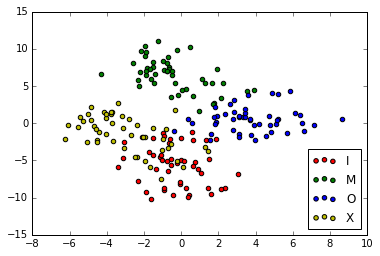

In [401]:
df = data.drop("class", axis=1)
# center data
df-=df.mean()
w,v = np.linalg.eigh(df.cov()*191) #normalize by multiplying by n-1
v2 = v.T[-2:]

print("eigenvectors: \n{}".format(v2.T))

col = v2.dot(np.array(df).T).T
colclas = [('r', 'I'), ('g', 'M'), ('b', 'O'), ('y', 'X')]
for i, (c, l) in zip(range(0, 192, 48), colclas):
    x,y = zip(*col[i:i+48])
    plt.scatter(x,y, c=c, label=l)
    
plt.legend(loc=4)

## (b) MDA

eigenvectors: 
[[ 0.0164636  -0.13698936]
 [-0.06858576 -0.27737427]
 [-0.0546345  -0.18905829]
 [-0.00256901 -0.00137855]
 [ 0.11993169 -0.5329115 ]
 [ 0.05007692 -0.75636344]
 [ 0.58741996 -0.02105779]
 [ 0.79377572  0.10967563]]


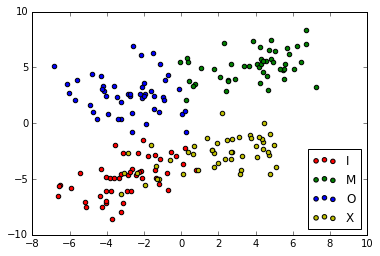

In [398]:
iclass=data[data["class"]==1].drop("class", axis=1)
mclass=data[data["class"]==2].drop("class", axis=1)
oclass=data[data["class"]==3].drop("class", axis=1)
xclass=data[data["class"]==4].drop("class", axis=1)

# center data
iclass-=iclass.mean()
mclass-=mclass.mean()
oclass-=oclass.mean()
xclass-=xclass.mean()

sw = 47*(iclass.cov()+mclass.cov()+oclass.cov()+xclass.cov()) #normalize by multiplying by n-1
st = df.cov()*191
sb = st-sw

swinvsb = np.dot(np.linalg.inv(sw),sb)

w,v = np.linalg.eigh(swinvsb)
v2 = v.T[-2:]

print("eigenvectors: \n{}".format(v2.T))

col = v2.dot(np.array(df).T).T
colclas = [('r', 'I'), ('g', 'M'), ('b', 'O'), ('y', 'X')]
for i, (c, l) in zip(range(0, 192, 48), colclas):
    x,y = zip(*col[i:i+48])
    plt.scatter(x,y, c=c, label=l)
    
plt.legend(loc=4)

Since MDA took into account the class of the point, it was able to keep the data more separate than PCA was. In both cases, with the top two eigenvectors, there was overlap between the I class and the X class. In PCA, there was some overlap between all of the classes in the center of the graph. In MDA, the classes were much more separated and the only classes that overlap are class I and class X, but less so than in PCA.